In [59]:
# Github: https://github.com/hhuynh000/EE399_HW1
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval

In [60]:
# Given data
x = np.arange(0,31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])


In [61]:
# Part II (i)
# define model function
def model(c, x):
  return c[0]*np.cos(c[1]*x) + c[2]*x + c[3]

# define the objective function
def lsq_error(c, x, y):
  return np.sqrt(np.sum((model(c, x) - y)**2)/len(y))

# set the initial guess for the parameters
v0 = np.array([3, 1*np.pi/4, 2/3, 32])

# perform optimization
res = opt.minimize(lsq_error, v0, args=(x, y), method='Nelder-Mead')

# get the optimized parameters
c = res.x

# generate the data for plotting
xt = np.arange(0, 31.01, 0.01)
yfit = model(c, xt)

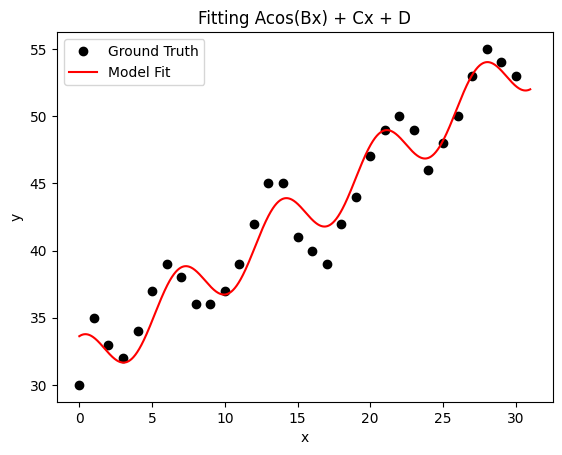

In [62]:
# Plot function
plt.plot(x, y, 'ko', label='Ground Truth')
plt.plot(xt, yfit, 'r-', label='Model Fit')
plt.title('Fitting Acos(Bx) + Cx + D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [63]:
# Part II (ii)

# sweep two parameter given by the tuple index over the 
# value 0 to 10 with a step of 1
def sweep(c, index):
  values = np.arange(0,10)
  c_sweep = []
  for v1 in values:
    for v2 in values:
      c_new = np.copy(c)
      c_new[index[0]] = v2
      c_new[index[1]] = v1
      c_sweep.append(c_new)
  return c_sweep

def plot_sweep(c_sweep, index):
  param = ['A', 'B', 'C', 'D']
  error_matrix = []
  errors = []
  i = 0
  for cs in c_sweep:
    error = lsq_error(cs, x, y)
    errors.append(error)
    if (10 == len(errors)):
      error_matrix.append(errors)
      errors = []
  
  plt.pcolor(error_matrix)
  plt.xlabel(param[index[0]])
  plt.ylabel(param[index[1]])

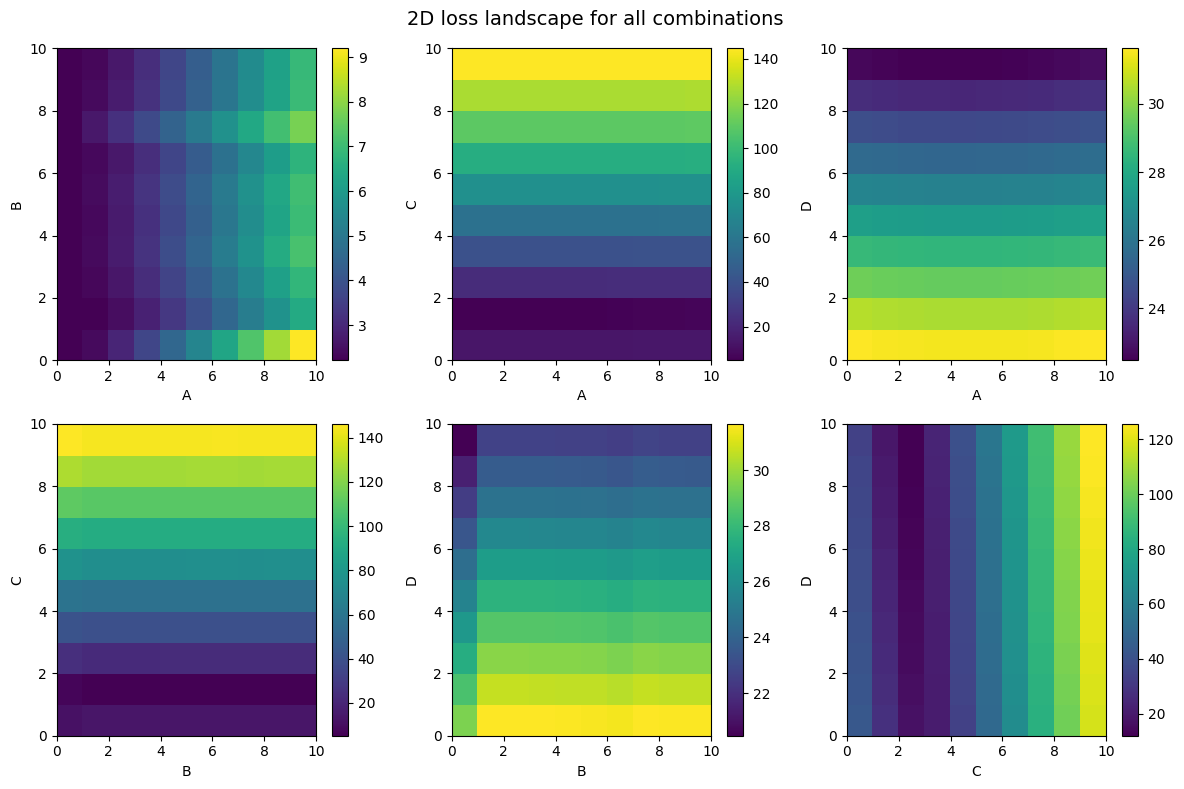

In [64]:
combs = [(0,1), (0,2), (0,3), (1,2), (1, 3), (2,3)]
plt.figure(figsize=(12,8))
plt.suptitle('2D loss landscape for all combinations', fontsize=14)
for i in range(len(combs)):
  c_sweep = sweep(c, combs[i])
  plt.subplot(2, 3, i+1)
  plot_sweep(c_sweep, combs[i])
  plt.colorbar()

plt.tight_layout()
plt.show()

In [65]:
# Part II (iii)

# split data into training and testing
x_train = x[0:20]
y_train = y[0:20]
x_test = x[20:30]
y_test = y[20:30]

# define line, parabola and 19th degree polynomial
def line(c, x):
  return c[0]*x + c[1]

def lsqe_line(c, x, y):
  return np.sqrt(np.sum((line(c, x) - y)**2)/len(y))

def parabola(c, x):
  return c[0]*x**2 + c[1]*x + c[2]

def lsqe_parabola(c, x, y):
  return np.sqrt(np.sum((parabola(c, x) - y)**2)/len(y))

def lsqe_poly19(c, x, y):
  return np.sqrt(np.sum((np.polyval(c, x) - y)**2)/len(y))

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


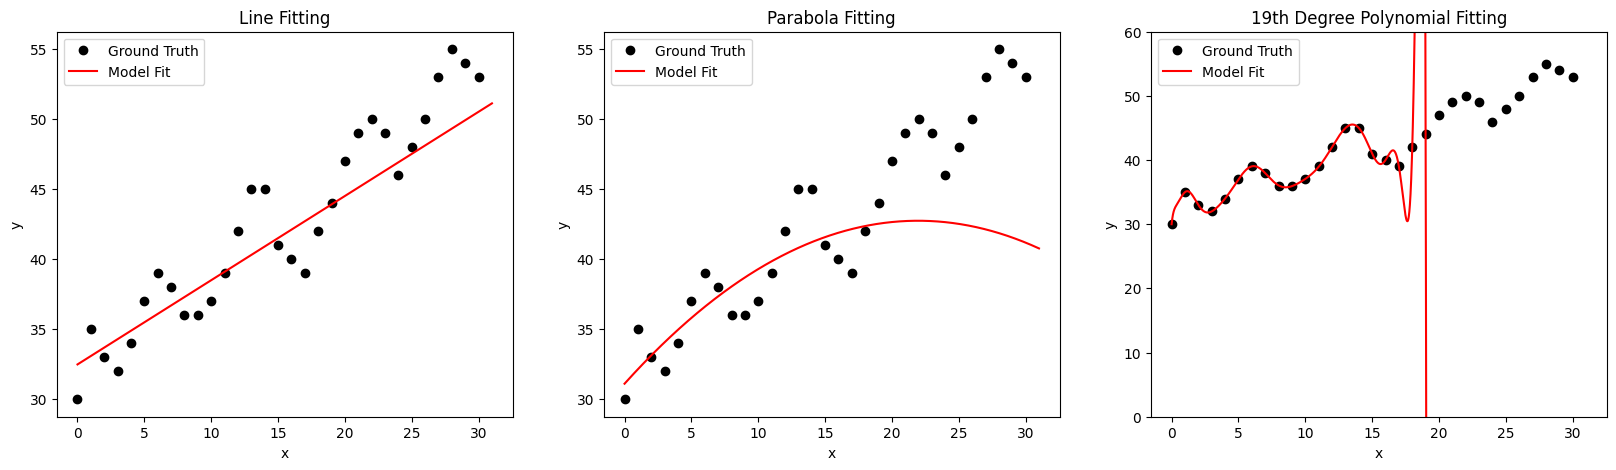

In [66]:
plt.figure(figsize=(20,5))
xt = np.arange(0, 31.01, 0.01)

# line fitting
ax = plt.subplot(1,3,1)
ax.set_title('Line Fitting')
# set the initial guess for the parameters
c0 = [0, 0]

res = opt.minimize(lsqe_line, c0, args=(x_train, y_train), method='Nelder-Mead')

# get the optimized parameters
c = res.x
# get training and testing errors
line_train_error = lsqe_line(c, x_train, y_train)
line_test_error = lsqe_line(c, x_test, y_test)

# generate the data for plotting
yfit = line(c, xt)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'ko', label='Ground Truth')
plt.plot(xt, yfit, 'r-', label='Model Fit')
plt.legend()

# parabola fitting
ax = plt.subplot(1,3,2)
ax.set_title('Parabola Fitting')
# set the initial guess for the parameters
c0 = [0, 0, 0]

res = opt.minimize(lsqe_parabola, c0, args=(x_train, y_train), method='Nelder-Mead')

# get the optimized parameters
c = res.x
# get training and testing errors
parabola_train_error = lsqe_parabola(c, x_train, y_train)
parabola_test_error = lsqe_parabola(c, x_test, y_test)

# generate the data for plotting
yfit = parabola(c, xt)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'ko', label='Ground Truth')
plt.plot(xt, yfit, 'r-', label='Model Fit')
plt.legend()

# 19th degree polynomial fitting  
ax = plt.subplot(1,3,3)
ax.set_title('19th Degree Polynomial Fitting')
# set the initial guess for the parameters
c = np.polyfit(x_train, y_train, 19)

# get training and testing errors
poly19_train_error = lsqe_poly19(c, x_train, y_train)
poly19_test_error = lsqe_poly19(c, x_test, y_test)

# generate the data for plotting
yfit = np.polyval(c, xt)
plt.plot(x, y, 'ko', label='Ground Truth')
plt.plot(xt, yfit, 'r-', label='Model Fit')
plt.legend()
plt.ylim((0,60))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [67]:
print('Line Fitting Training Error:', line_train_error)
print('Line Fitting Testing Error:', line_test_error)
print('Parabola Fitting Training Error:', parabola_train_error)
print('Parabola Fitting Testing Error:', parabola_test_error)
print('19th Degree Polynomial Fitting Training Error:', poly19_train_error)
print('19th Degree Polynomial Fitting Testing Error:', poly19_test_error)

Line Fitting Training Error: 2.2427493869091553
Line Fitting Testing Error: 3.440280484250611
Parabola Fitting Training Error: 2.1255393483833744
Parabola Fitting Testing Error: 8.340111246602799
19th Degree Polynomial Fitting Training Error: 0.02835144302630829
19th Degree Polynomial Fitting Testing Error: 10921276344.036388


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


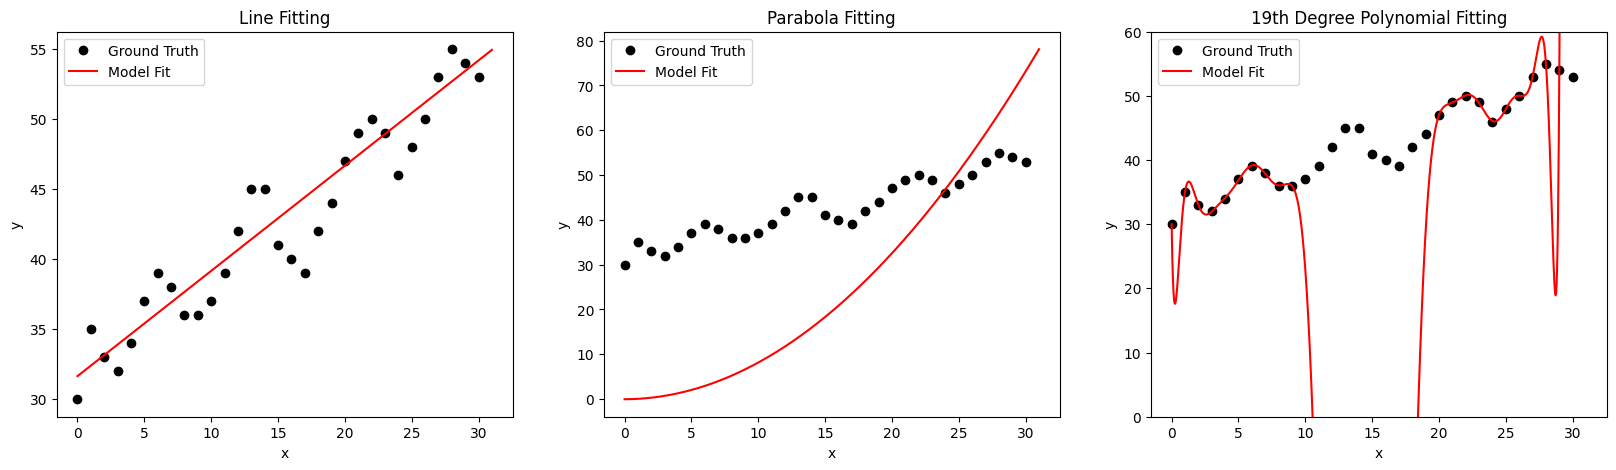

In [68]:
# Part II (iv)

# split data into training and testing
x_train = np.concatenate((x[0:10], x[20:30]))
y_train = np.concatenate((y[0:10], y[20:30]))
x_test = x[10:20]
y_test = y[10:20]

plt.figure(figsize=(20,5))
xt = np.arange(0, 31.01, 0.01)

# line fitting
ax = plt.subplot(1,3,1)
ax.set_title('Line Fitting')
# set the initial guess for the parameters
c0 = [0, 0]

res = opt.minimize(lsqe_line, c0, args=(x_train, y_train), method='Nelder-Mead')

# get the optimized parameters
c = res.x
# get training and testing errors
line_train_error = lsqe_line(c, x_train, y_train)
line_test_error = lsqe_line(c, x_test, y_test)

# generate the data for plotting
yfit = line(c, xt)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'ko', label='Ground Truth')
plt.plot(xt, yfit, 'r-', label='Model Fit')
plt.legend()

# parabola fitting
ax = plt.subplot(1,3,2)
ax.set_title('Parabola Fitting')
# set the initial guess for the parameters
c0 = [0, 0, 0]

res = opt.minimize(lsqe_parabola, c0, args=(x_train, y_train), method='Nelder-Mead')

# get the optimized parameters
c = res.x
# get training and testing errors
parabola_train_error = lsqe_parabola(c, x_train, y_train)
parabola_test_error = lsqe_parabola(c, x_test, y_test)

# generate the data for plotting
yfit = parabola(c, xt)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'ko', label='Ground Truth')
plt.plot(xt, yfit, 'r-', label='Model Fit')
plt.legend()

# 19th degree polynomial fitting  
ax = plt.subplot(1,3,3)
ax.set_title('19th Degree Polynomial Fitting')
# set the initial guess for the parameters
c = np.polyfit(x_train, y_train, 19)

# get training and testing errors
poly19_train_error = lsqe_poly19(c, x_train, y_train)
poly19_test_error = lsqe_poly19(c, x_test, y_test)

# generate the data for plotting
yfit = np.polyval(c, xt)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'ko', label='Ground Truth')
plt.plot(xt, yfit, 'r-', label='Model Fit')
plt.legend()
plt.ylim((0,60))
plt.show()

In [69]:
print('Line Fitting Training Error:', line_train_error)
print('Line Fitting Testing Error:', line_test_error)
print('Parabola Fitting Training Error:', parabola_train_error)
print('Parabola Fitting Testing Error:', parabola_test_error)
print('19th Degree Polynomial Fitting Training Error:', poly19_train_error)
print('19th Degree Polynomial Fitting Testing Error:', poly19_test_error)

Line Fitting Training Error: 1.8371990178881916
Line Fitting Testing Error: 2.9775633405226936
Parabola Fitting Training Error: 24.11618039436958
Parabola Fitting Testing Error: 24.50145796878462
19th Degree Polynomial Fitting Training Error: 0.07595398396701405
19th Degree Polynomial Fitting Testing Error: 249.74063026269218


### Results Comparision
Part iv line fit preforms a bit better on testing data with a least square error of 3.44 compared to part iii with a least square error of 2.98. The decrease in error can be the result of using the edge data points. The data points follows a linear trend, therefore having training data at the start and end better fit the line function. \
\
Part iv parabola fit preforms worse on testing data with a least square error of 24.5 compared to part iii with a least square error of 8.34. The increase in error can be due to the fact that it is harder to fit a parabola function with training data at the start and end or the initial parameters led to a bad local minima. \
\
The 19th degree polynomial fit for both part fit almost perfectly with the training data, but completely miss the testing data. This result make sense since an nth degree polynominal can fit n data points.
